# Classificador Beatles or Rolling Stones #
_____________________________________________

## Importar bibliotecas

In [3]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pickle
import matplotlib.pyplot as plt

## Carregar dataset

In [5]:
df = pd.read_csv("../../../data/df-beatles-or-stones.csv")

#  1 = Beatles; 2 = Rolling Stones

df.sample(5)

texto  classe
182      Tell me baby what's my name       2
533               He got muddy water       1
573     It's been a hard day's night       1
500  And sea of green (sea of green)       1
557     It's been a hard day's night       1

## Vetorizar e separar treino e teste

In [6]:
vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(df["texto"])
Y = df['classe']

Xtrain, Xtest, Ytrain, Ytest = train_test_split(
                X,
                Y,
                test_size=0.2,
                random_state=42,
                stratify = Y)

## Treinar modelo

In [7]:
model = GaussianNB().fit(Xtrain.toarray(), Ytrain)

## Testar modelo

In [8]:
Yhat = model.predict(Xtest.toarray())
report = classification_report(Ytest, Yhat, output_dict=True)

print(report['macro avg']['f1-score'])

0.8233323180018276


## Salvar modelo

In [9]:
pickle.dump(model, open('./modelo/model.p', 'wb'))
pickle.dump(vectorizer, open('./modelo/vectorizer.p', 'wb'))

## Plotar Matriz de Confusão

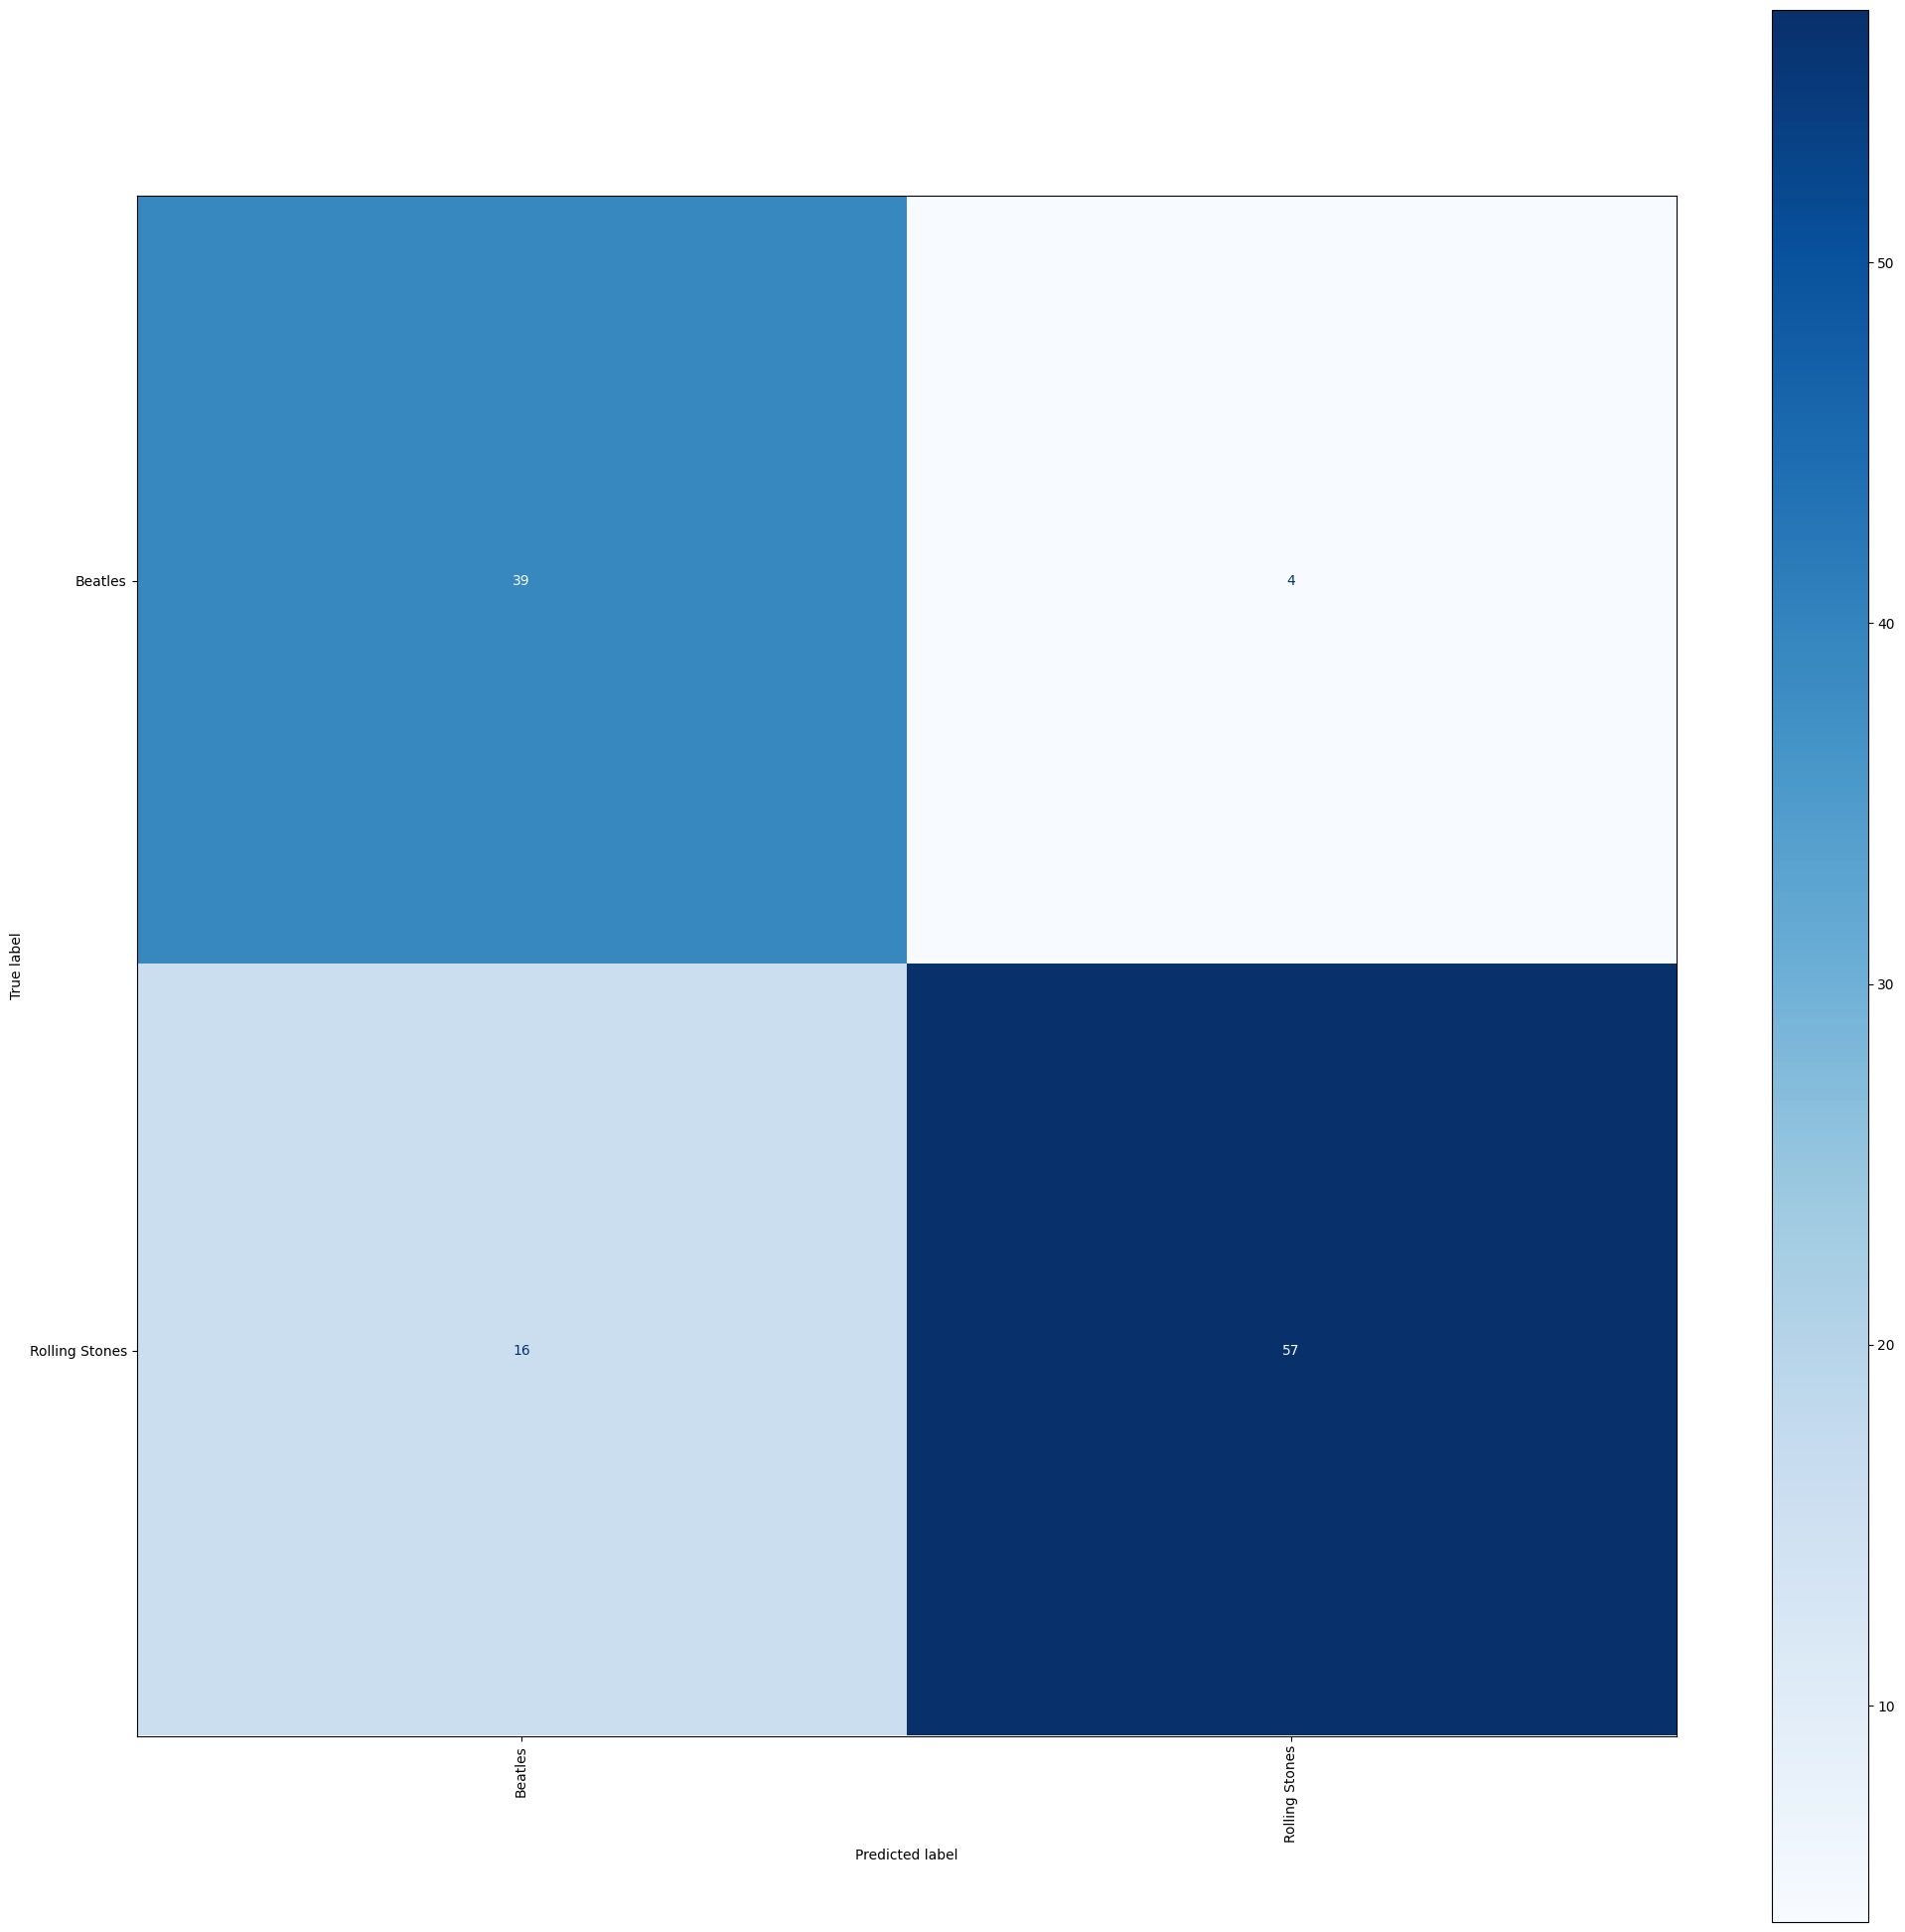

In [10]:
fig = plt.figure(figsize = (25, 25))
ax = fig.add_subplot(1, 1, 1)
cm = confusion_matrix(Ytest, Yhat)
cm = ConfusionMatrixDisplay(cm, display_labels = ['Beatles', 'Rolling Stones'])
cm.plot(values_format = 'd', cmap = 'Blues', ax = ax)
plt.xticks(rotation = 90)
plt.rcParams.update({'font.size': 50})
plt.savefig("matriz_confusao.png")